# Graphing exposure data

## Relative imports

In [2]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np


## Relative number of exposed devices

In the following graph, we attempt to map out the number exposed devices detected over time.

C:\Users\Atomic\AppData\Local\Temp\ipykernel_21928\3565803981.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_value = df[df.date == d][df.type==c]


36 36


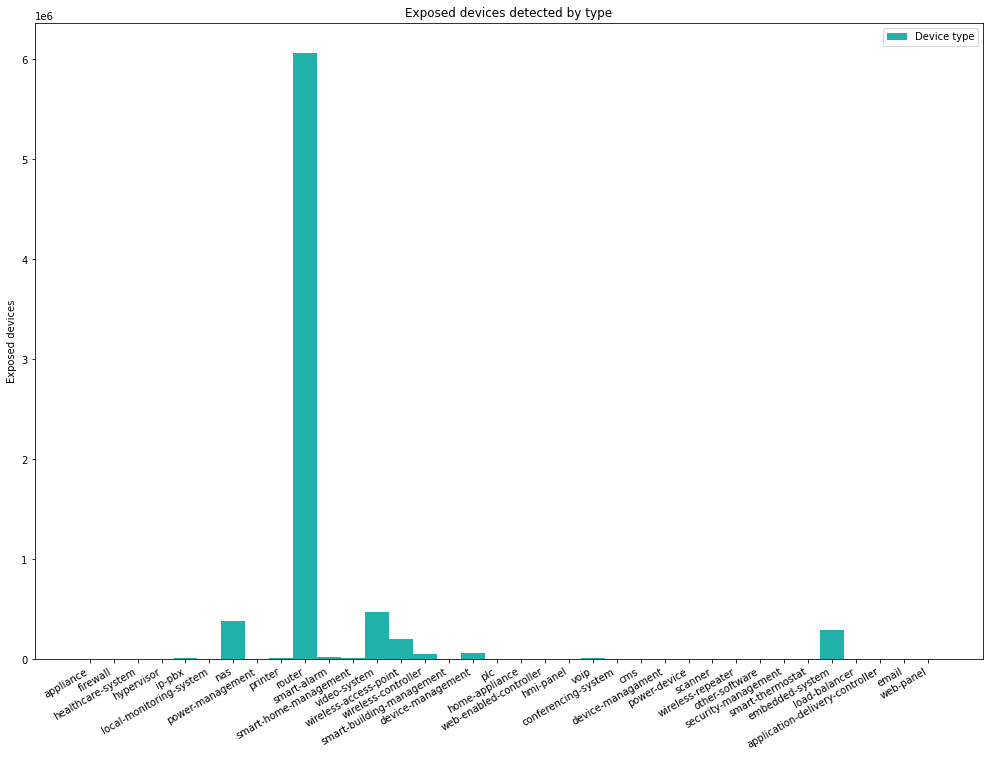

In [5]:

df = pd.read_csv('exposed_by_type.csv')

dates = list(df.date.unique())
categories = list(df['type'].unique())

colors = ['#a9a9a9', '#2f4f4f', '#556b2f', '#8b4513', '#483d8b', '#008000', '#3cb371', '#b8860b',
          '#bdb76b',
          '#000080',
         '#20b2aa', '#32cd32', '#8b008b', '#b03060', '#ff0000', '#ff8c00',
          '#ffff00', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', 
          '#00bfff', '#adff2f', 
          '#da70d6',
          '#ff00ff', '#6495ed', '#ff1493', '#7b68ee', '#ffa07a', '#afeeee', '#7fffd4', '#ffe4c4', 
          '#ffb6c1']

data = {}
for c in categories:
  if c == '':
    data[c] = 0
  else:
    data[c] = []
    for d in dates:
      df_value = df[df.date == d][df.type==c]
      if not df_value.empty:
        data[c] += [df_value.iloc[0]['count']]

    data[c] = sum(data[c]) / len(data[c])

x_axis = np.arange(0.5, (len(data.values()) + 1) * 0.5, 0.5)

plt.rcParams["figure.figsize"] = (17,13)
fig, ax = plt.subplots()

width = 0.5

dates = mdates.num2date(mdates.datestr2num(dates))

ax.bar(x_axis, list(data.values()), width=width, label='Device type', color=colors[10])

ax.set_ylabel('Exposed devices')
ax.set_title('Exposed devices detected by type')
ax.legend(loc='best')

plt.xticks(x_axis, categories)
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.savefig('../images/exposed_bytype_cluster.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2, dpi=300)
plt.show()

## Identifying exposed devices detected per day.

36 36


C:\Users\Atomic\AppData\Local\Temp\ipykernel_21928\4085768017.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_value = df[df.date == d][df.type==c]


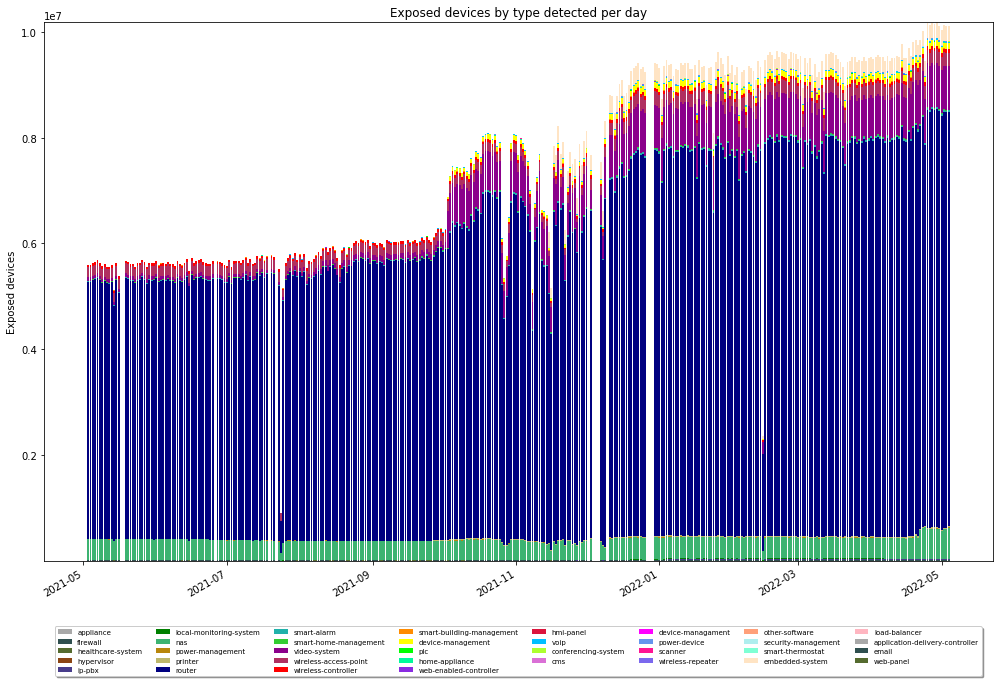

In [10]:
df = pd.read_csv('exposed_by_type.csv')

dates = list(df.date.unique())
categories = list(df['type'].unique())

colors = ['#a9a9a9', '#2f4f4f', '#556b2f', '#8b4513', '#483d8b', '#008000', '#3cb371', '#b8860b',
          '#bdb76b',
          '#000080',
         '#20b2aa', '#32cd32', '#8b008b', '#b03060', '#ff0000', '#ff8c00',
          '#ffff00', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', 
          '#00bfff', '#adff2f', 
          '#da70d6',
          '#ff00ff', '#6495ed', '#ff1493', '#7b68ee', '#ffa07a', '#afeeee', '#7fffd4', '#ffe4c4', 
          '#ffb6c1', '#a9a9a9', '#2f4f4f', '#556b2f']
print(len(categories), len(colors))
data = {}
for c in categories:
  data[c] = []
  for d in dates:
    df_value = df[df.date == d][df.type==c]
    if df_value.empty:
      data[c] += [0]
    else:
      data[c] += [df_value.iloc[0]['count']]

plt.rcParams["figure.figsize"] = (17,11)
fig, ax = plt.subplots()

width = 0.8

dates = mdates.num2date(mdates.datestr2num(dates))

bottom = data[categories[0]]
ax.bar(dates, bottom, width=width, label=categories[0], color=colors[0])
for i in range(1, len(categories)):
  ax.bar(dates, data[categories[i]], width=width, label=categories[i], bottom=bottom, color=colors[i])
  bottom = [bottom[j] + data[categories[i]][j] for j in range(len(bottom))]

ax.set_ylabel('Exposed devices')
ax.set_title('Exposed devices by type detected per day')
ax.legend(bbox_to_anchor=(0.5, -0.22), loc='lower center', fontsize='x-small', ncol=8, fancybox=True, shadow=True)

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.savefig('../images/exposed_bytype.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2, dpi=300)
plt.show()

## Identifying exposed devices detected per day (by vendor)

C:\Users\Atomic\AppData\Local\Temp\ipykernel_21928\1749956583.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_value = df[df.date == d][df.vendor==v]


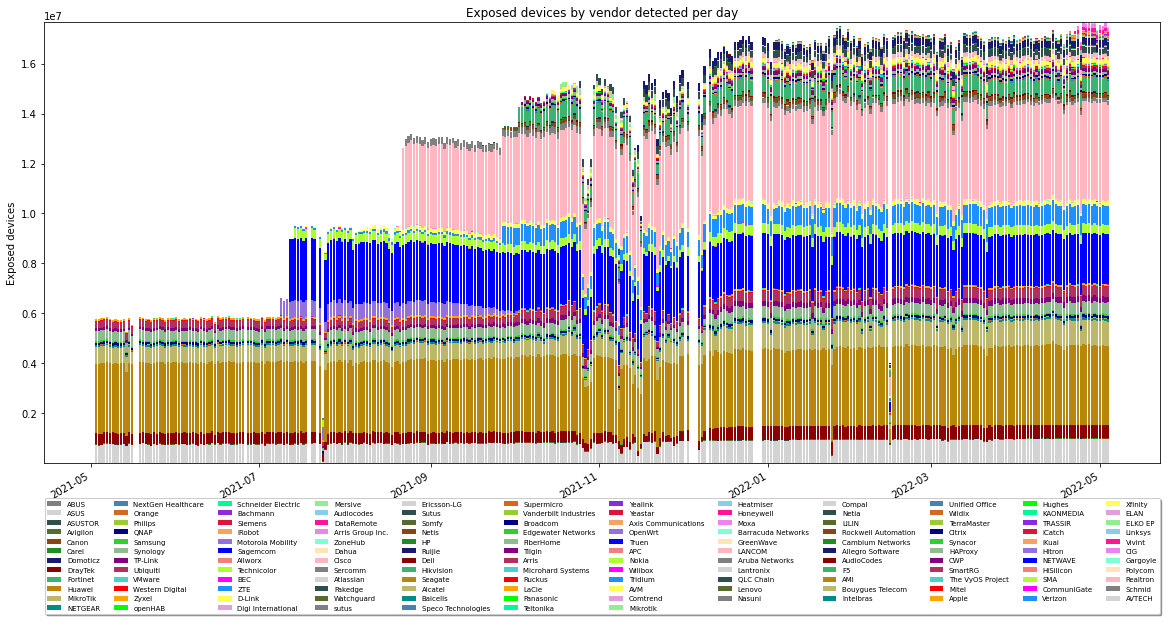

In [15]:

df = pd.read_csv('exposed_by_vendor.csv')

dates = list(df.date.unique())
vendors = list(df.vendor.unique())

colors = ['#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#8b4513', '#228b22', '#191970', '#8b0000', '#3cb371', '#b8860b', '#bdb76b', '#008b8b', '#4682b4', '#d2691e', '#9acd32', '#00008b', '#32cd32', '#8fbc8f', '#800080', '#b03060', '#48d1cc', '#ff0000', '#ffa500', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', '#f4a460', '#9370db', '#0000ff', '#f08080', '#adff2f', '#ff00ff', '#1e90ff', '#ffff54', '#dda0dd', '#90ee90', '#87ceeb', '#ff1493', '#ee82ee', '#7fffd4', '#ffe4b5', '#ffb6c1', '#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#808080', '#d3d3d3', 
'#2f4f4f', '#556b2f', '#8b4513', '#228b22', '#191970', '#8b0000', '#3cb371', '#b8860b', '#bdb76b', '#008b8b', '#4682b4', '#d2691e', '#9acd32', '#00008b', '#32cd32', '#8fbc8f', '#800080', '#b03060', '#48d1cc', '#ff0000', '#ffa500', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', '#f4a460', '#9370db', '#0000ff', '#f08080', '#adff2f', '#ff00ff', '#1e90ff', '#ffff54', '#dda0dd', '#90ee90', '#87ceeb', '#ff1493', '#ee82ee', '#7fffd4', '#ffe4b5', '#ffb6c1', '#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#8b4513', '#228b22', '#191970', '#8b0000', '#3cb371', '#b8860b', '#bdb76b', '#008b8b', '#4682b4', '#d2691e', '#9acd32', '#00008b', '#32cd32', '#8fbc8f', '#800080', '#b03060', '#48d1cc', '#ff0000', '#ffa500', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', '#f4a460', '#9370db', '#0000ff', '#f08080', '#adff2f', '#ff00ff', '#1e90ff', '#ffff54', '#dda0dd', '#90ee90', '#87ceeb', '#ff1493', '#ee82ee', '#7fffd4', '#ffe4b5', '#ffb6c1', '#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#8b4513']

data = {}
for v in vendors:
  data[v] = []
  for d in dates:
    df_value = df[df.date == d][df.vendor==v]
    if df_value.empty:
      data[v] += [0]
    else:
      data[v] += [df_value.iloc[0]['count']]

plt.rcParams["figure.figsize"] = (20,9)
fig, ax = plt.subplots()

width = 0.8

dates = mdates.num2date(mdates.datestr2num(dates))

bottom = data[vendors[0]]

ax.bar(dates, bottom, width=width, label=vendors[0], color=colors[0])
for i in range(1, len(vendors)):
  ax.bar(dates, data[vendors[i]], width=width, label=vendors[i], bottom=bottom, color=colors[i])
  bottom = [bottom[j] + data[vendors[i]][j] for j in range(len(bottom))]

ax.set_ylabel('Exposed devices')
ax.set_title('Exposed devices by vendor detected per day')
ax.legend(bbox_to_anchor=(0.5, -0.35), loc='lower center', fontsize='x-small', ncol=12, fancybox=True, shadow=True)

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.savefig('../images/exposed_byvendor.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2, dpi=300)
plt.show()

C:\Users\Atomic\AppData\Local\Temp\ipykernel_21928\886835961.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_value = df[df.date == d][df['type']==c]


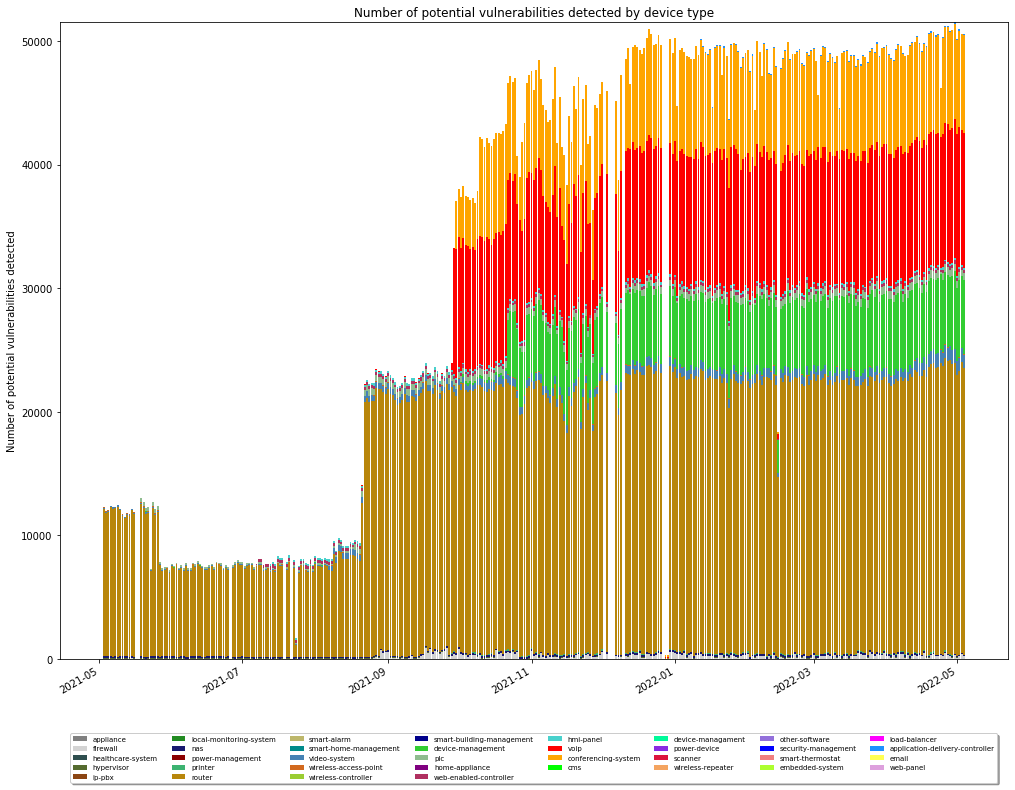

In [20]:
df = pd.read_csv('exposed_by_type_num_of_vulns.csv')

dates = list(df.date.unique())
data = {}
for c in categories:
  data[c] = []
  for d in dates:
    df_value = df[df.date == d][df['type']==c]
    if df_value.empty:
      data[c] += [0]
    else:
      data[c] += [df_value.iloc[0]['vulnerability_count']]


plt.rcParams["figure.figsize"] = (17,13)
fig, ax = plt.subplots()

width = 0.8

dates = mdates.num2date(mdates.datestr2num(dates))

bottom =  data[categories[0]]
ax.bar(dates, bottom, width=width, label=categories[0], color=colors[0])
for i in range(1, len(categories)):
  ax.bar(dates, data[categories[i]], width=width, label=categories[i], bottom=bottom, color=colors[i])
  bottom = [bottom[j] + data[categories[i]][j] for j in range(len(bottom))]

ax.set_ylabel('Number of potential vulnerabilities detected')
ax.set_title('Number of potential vulnerabilities detected by device type')
ax.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', fontsize='x-small', ncol=8, fancybox=True, shadow=True)

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.savefig('../images/exposed_number_of_vulns_bytype.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2, dpi=300)
plt.show()

C:\Users\Atomic\AppData\Local\Temp\ipykernel_21928\1944903826.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_value = df[df.date == d][df.vendor==v]


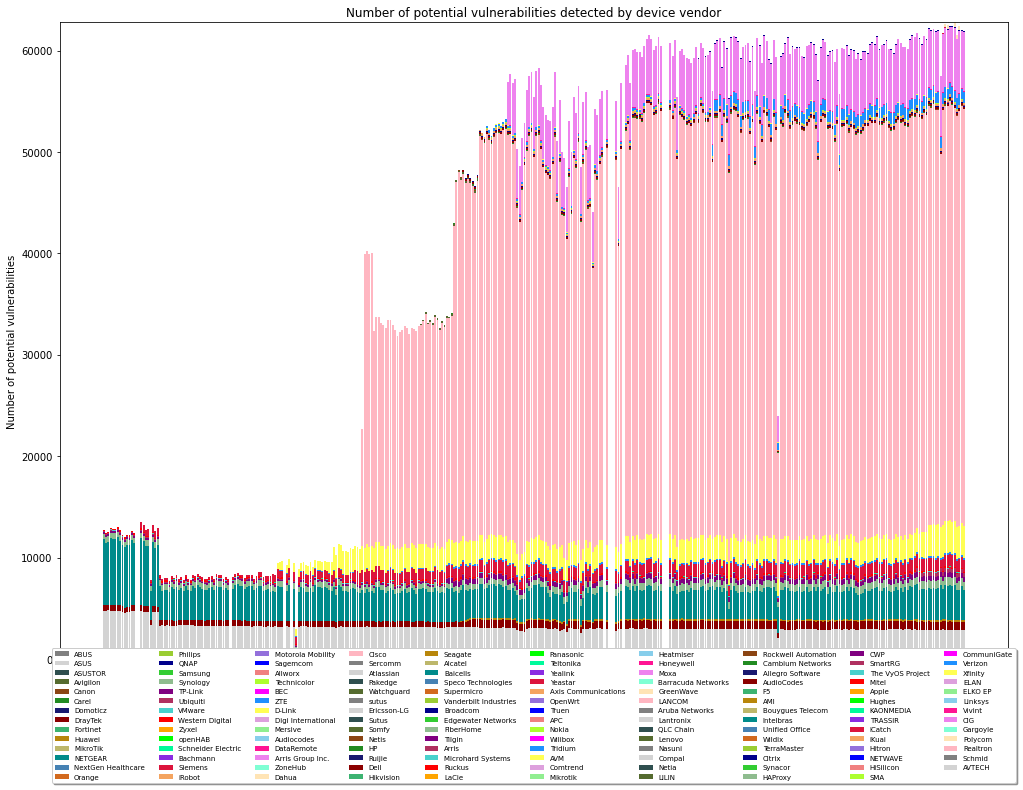

In [22]:

df = pd.read_csv('exposed_by_vendor_num_of_vulns.csv')

dates = list(df.date.unique())
data = {}
for v in vendors:
  data[v] = []
  for d in dates:
    df_value = df[df.date == d][df.vendor==v]
    if df_value.empty:
      data[v] += [0]
    else:
      data[v] += [df_value.iloc[0]['vulnerability_count']]

plt.rcParams["figure.figsize"] = (17,13)
fig, ax = plt.subplots()

width = 0.8

dates = mdates.num2date(mdates.datestr2num(dates))

bottom = data[vendors[0]]
ax.bar(dates, bottom, width=width, label=vendors[0], color=colors[0])
for i in range(1, len(vendors)):
  ax.bar(dates, data[vendors[i]], width=width, label=vendors[i], bottom=bottom, color=colors[i])
  bottom = [bottom[j] + data[vendors[i]][j] for j in range(len(bottom))]

ax.set_ylabel('Number of potential vulnerabilities')
ax.set_title('Number of potential vulnerabilities detected by device vendor')
ax.legend(bbox_to_anchor=(0.5, -0.20), loc='lower center', fontsize='x-small', ncol=10, fancybox=True, shadow=True)

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.savefig('../images/exposed_number_of_vulns_byvendor.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2, dpi=300)
plt.show()

##

In [6]:
colors = ['#00E5CB', '#03E1C8', '#06DDC5', '#09DAC2', '#0CD6BF', '#0FD2BC', '#12CFB9', '#15CBB6', '#18C7B3', '#1BC4B1', '#1EC0AE', '#21BDAB', '#24B9A8', '#27B5A5', '#2AB2A2', '#2DAE9F', '#30AA9C', '#33A799', '#36A397', '#399F94', '#3C9C91', '#3F988E', '#42958B', '#459188', '#488D85', '#4B8A82', '#4E867F', '#51827D', '#547F7A', '#577B77', '#5A7774', '#5D7471', '#61706E', '#646D6B', '#676968', '#6A6565', '#6D6263', '#705E60', '#735A5D', '#76575A', '#795357', '#7C4F54', '#7F4C51', '#82484E', '#85454B', '#884149', '#8B3D46', '#8E3A43', '#913640', '#94323D', '#972F3A', '#9A2B37', '#9D2734', '#A02431', '#A3202F', '#A61D2C', '#A91929', '#AC1526', '#AF1223', '#B20E20', '#B50A1D', '#B8071A', '#BB0317', '#BF0015', '#00E50E', '#02E110', '#05DD13', '#08DA16', '#0BD619', '#0ED21C', '#11CF1E', '#14CB21', '#17C724', '#1AC427', '#1DC02A', '#20BD2C', '#23B92F', '#26B532', '#29B235', '#2CAE38', '#2FAA3A', '#32A73D', '#35A340', '#389F43', '#3B9C46', '#3E9849', '#41954B', '#44914E', '#478D51', '#4A8A54', '#4D8657', '#508259', '#537F5C', '#567B5F', '#597762', '#5C7465', '#5E7067', '#616D6A', '#64696D', '#676570', '#6A6273', '#6D5E75', '#705A78', '#73577B', '#76537E', '#794F81', '#7C4C84', '#7F4886', '#824589', '#85418C', '#883D8F', '#8B3A92', '#8E3694', '#913297', '#942F9A', '#972B9D', '#9A27A0', '#9D24A2', '#A020A5', '#A31DA8', '#A619AB', '#A915AE', '#AC12B0', '#AF0EB3', '#B20AB6', '#B507B9', '#B803BC', '#BB00BF']

C:\Users\Atomic\AppData\Local\Temp\ipykernel_38072\2102305120.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_value = df[df.date == d][df.infection==i]


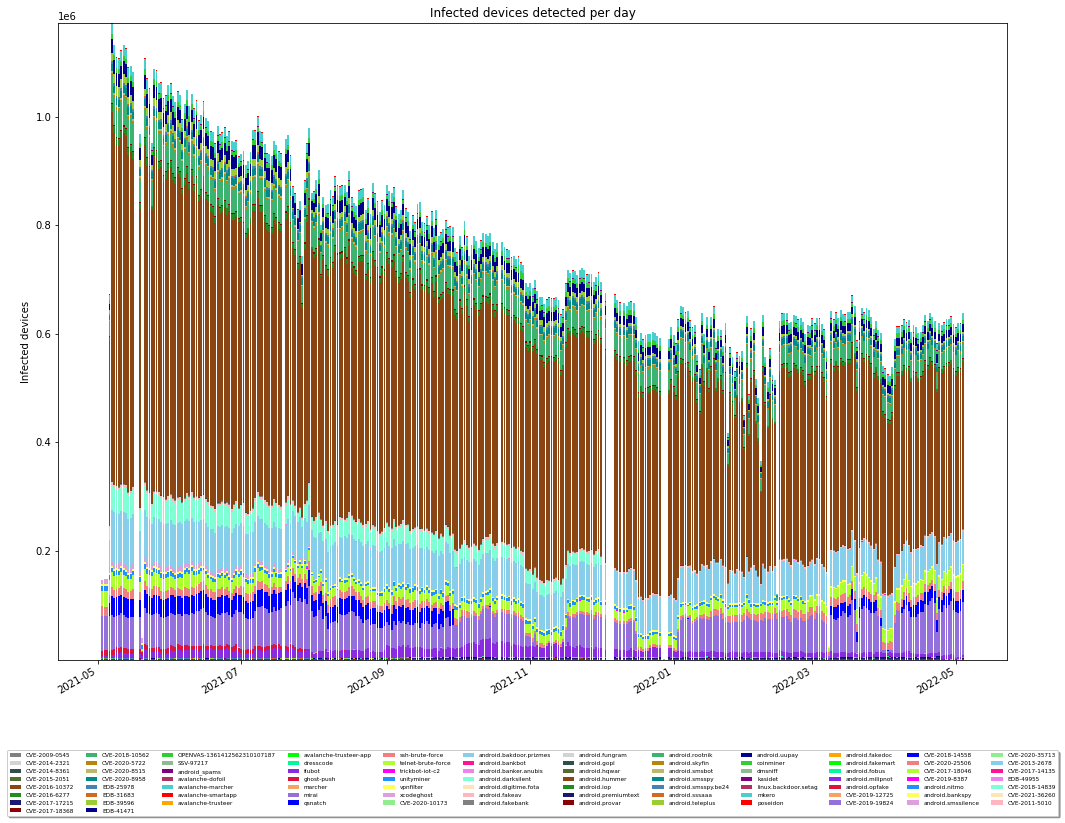

In [7]:

df = pd.read_csv('infected_by_infection.csv')

dates = list(df.date.unique())
infection = ['CVE-2009-0545', 'CVE-2014-2321', 'CVE-2014-8361', 'CVE-2015-2051', 'CVE-2016-10372', 'CVE-2016-6277', 'CVE-2017-17215', 'CVE-2017-18368', 
  'CVE-2018-10562', 'CVE-2020-5722', 'CVE-2020-8515', 'CVE-2020-8958', 'EDB-25978', 'EDB-31683', 'EDB-39596', 'EDB-41471', 
  'OPENVAS-1361412562310107187', 'SSV-97217', 'android_spams', 'avalanche-dofoil', 'avalanche-marcher', 'avalanche-smartapp', 'avalanche-trusteer', 'avalanche-trusteer-app',
  'dresscode', 'flubot', 'ghost-push', 'marcher', 'mirai', 'qsnatch', 'ssh-brute-force', 'telnet-brute-force',
  'trickbot-iot-c2', 'unityminer', 'vpnfilter', 'xcodeghost', 'CVE-2020-10173', 'android.bakdoor.prizmes', 'android.bankbot', 'android.banker.anubis',
  'android.darksilent', 'android.digitime.fota', 'android.fakeav', 'android.fakebank', 'android.fungram', 'android.gopl', 'android.hqwar', 
  'android.hummer', 
  'android.iop', 'android.premiumtext', 'android.provar', 'android.rootnik', 'android.skyfin', 'android.smsbot', 'android.smsspy', 'android.smsspy.be24', 
  'android.sssaaa', 'android.teleplus', 'android.uupay', 'coinminer', 'dmsniff', 'kasidet', 'linux.backdoor.setag', 'mkero',
  'poseidon', 'android.fakedoc', 'android.fakemart', 'android.fobus', 'android.milipnot', 'android.opfake', 'CVE-2019-12725', 'CVE-2019-19824',
  'CVE-2018-14558', 'CVE-2020-25506', 'CVE-2017-18046', 'CVE-2019-8387', 'android.nitmo', 'android.bankspy', 'android.smssilence', 'CVE-2020-35713', 
  'CVE-2013-2678', 'CVE-2017-14135', 'EDB-49955', 'CVE-2018-14839', 'CVE-2021-36260', 'CVE-2011-5010']

colors = ['#808080', '#d3d3d3', '#2f4f4f', '#556b2f', '#8b4513', '#228b22', '#191970', 
'#8b0000', '#3cb371', '#b8860b', '#bdb76b', '#008b8b', '#4682b4', '#d2691e', '#9acd32', '#00008b', '#32cd32', '#8fbc8f', '#800080', '#b03060', '#48d1cc', '#ff0000', '#ffa500', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', '#f4a460', '#9370db', '#0000ff', '#f08080', '#adff2f', '#ff00ff', '#1e90ff', '#ffff54', '#dda0dd', '#90ee90', '#87ceeb', '#ff1493', '#ee82ee', '#7fffd4', '#ffe4b5', '#ffb6c1', '#808080', '#d3d3d3', '#2f4f4f', '#556b2f',
'#8b4513',
 '#228b22', '#191970', 
'#8b0000', '#3cb371', '#b8860b', '#bdb76b', '#008b8b', '#4682b4', '#d2691e', '#9acd32', '#00008b', '#32cd32', '#8fbc8f', '#800080', '#b03060', '#48d1cc', '#ff0000', '#ffa500', '#00ff00', '#00fa9a', '#8a2be2', '#dc143c', '#f4a460', '#9370db', '#0000ff', '#f08080', '#adff2f', '#ff00ff', '#1e90ff', '#ffff54', '#dda0dd', '#90ee90', '#87ceeb', '#ff1493', '#ee82ee', '#7fffd4', '#ffe4b5', '#ffb6c1']


data = {}
for i in infection:
  data[i] = []
  for d in dates:
    df_value = df[df.date == d][df.infection==i]
    if df_value.empty:
      data[i] += [0]
    else:
      data[i] += [df_value.iloc[0]['count']]

plt.rcParams["figure.figsize"] = (17,13)
fig, ax = plt.subplots()

width = 0.8

dates = mdates.num2date(mdates.datestr2num(dates))

bottom = data[infection[0]]
ax.bar(dates, bottom, width=width, label=infection[0], color=colors[0])
for i in range(1, len(infection)):
  ax.bar(dates, data[infection[i]], width=width, label=infection[i], bottom=bottom, color=colors[i])
  bottom = [bottom[j] + data[infection[i]][j] for j in range(len(bottom))]

ax.set_ylabel('Infected devices')
ax.set_title('Infected devices detected per day')
ax.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', fontsize='xx-small', ncol=12, fancybox=True, shadow=True)

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.savefig('../images/infections.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2)
plt.show()

## Attempt graphing over time

In [8]:
def lerp(start, end, t):
	r = start[0] + (end[0] - start[0]) * t
	g = start[1] + (end[1] - start[1]) * t
	b = start[2] + (end[2] - start[2]) * t
	a = start[3] + (end[3] - start[3]) * t
	return (r / 255.0, g / 255.0, b / 255.0, a)

In [9]:
df = pd.read_csv('infected_by_infection.csv')
scales = [0, 			50, 				250, 			1000, 		10000, 			50000]
colors = [(0x85, 0xff, 0x00, 1.0), (0xff, 0xf1, 0x00, 1.0), (0xff, 0xaa, 0x04, 1.0), (0xff, 0x00, 0x00, 1.0), (0xdc, 0x00, 0xff, 1.0), (0x67, 0x00, 0xd4, 1.0)]
dates = list(df.date.unique())

done = 0
output = {}
for infection in infection_names:
	c = []
	for d in range(len(dates)):
		#print(dates[d], infection in list(df[(df.date == dates[d])]['infection']))
		if not infection in list(df[(df.date == dates[d])]['infection']) or df[(df.date == dates[d]) & (df.infection == infection)]['count'].iloc[0] == 0:
			c += [(0, 0, 0, 0)]
		else:
			v = df[(df.date == dates[d]) & (df.infection == infection)]['count'].iloc[0]
			idx = -1
			for s in range(len(scales) - 1):
				if scales[s] < v and v <= scales[s+1]:
					idx = s
			if idx == -1:
				c += [lerp(colors[-1], colors[-1], 0.5)]
			else:
				c += [lerp(colors[idx], colors[idx+1], (v - scales[idx])/(scales[idx + 1] - scales[idx]))]
	done += 1
	print(f'{str(done).zfill(len(str(len(infection_names))))}/{len(infection_names)}: {infection}')
	output[infection] = c


001/103: CVE-2016-10372
002/103: android.provar
003/103: avalanche-trusteer-app
004/103: EDB-39596
005/103: avalanche-marcher
006/103: kasidet
007/103: CVE-2021-36260
008/103: CVE-2020-17456
009/103: mkero
010/103: EDB-31683
011/103: android.banker.anubis
012/103: teleru
013/103: avalanche-trusteer
014/103: android.hummer
015/103: CVE-2022-25075
016/103: android.gopl
017/103: mirai
018/103: android.digitime.fota
019/103: marcher
020/103: CVE-2016-6277
021/103: coinminer
022/103: SSV-97217
023/103: CVE-2014-3206
024/103: android.hqwar
025/103: android.premiumtext
026/103: android.teleplus
027/103: CVE-2017-18368
028/103: EDB-25978
029/103: android_spams
030/103: OPENVAS-1361412562310107187
031/103: avalanche-smartapp
032/103: android.fakebank
033/103: android.smssilence
034/103: CVE-2021-45382
035/103: qsnatch
036/103: CVE-2011-5010 
037/103: vpnfilter
038/103: android.smsbot
039/103: ssh-brute-force
040/103: EDB-42114
041/103: android.uupay
042/103: CVE-2014-8361
043/103: CVE-2017-1413

In [10]:
dates = list(df.date.unique())
m_dates = mdates.num2date(mdates.datestr2num(dates))
m_dates[-1]

datetime.datetime(2022, 5, 4, 0, 0, tzinfo=datetime.timezone.utc)

001/103: CVE-2016-10372
002/103: android.provar
003/103: avalanche-trusteer-app
004/103: EDB-39596
005/103: avalanche-marcher
006/103: kasidet
007/103: CVE-2021-36260
008/103: CVE-2020-17456
009/103: mkero
010/103: EDB-31683
011/103: android.banker.anubis
012/103: teleru
013/103: avalanche-trusteer
014/103: android.hummer
015/103: CVE-2022-25075
016/103: android.gopl
017/103: mirai
018/103: android.digitime.fota
019/103: marcher
020/103: CVE-2016-6277
021/103: coinminer
022/103: SSV-97217
023/103: CVE-2014-3206
024/103: android.hqwar
025/103: android.premiumtext
026/103: android.teleplus
027/103: CVE-2017-18368
028/103: EDB-25978
029/103: android_spams
030/103: OPENVAS-1361412562310107187
031/103: avalanche-smartapp
032/103: android.fakebank
033/103: android.smssilence
034/103: CVE-2021-45382
035/103: qsnatch
036/103: CVE-2011-5010 
037/103: vpnfilter
038/103: android.smsbot
039/103: ssh-brute-force
040/103: EDB-42114
041/103: android.uupay
042/103: CVE-2014-8361
043/103: CVE-2017-1413

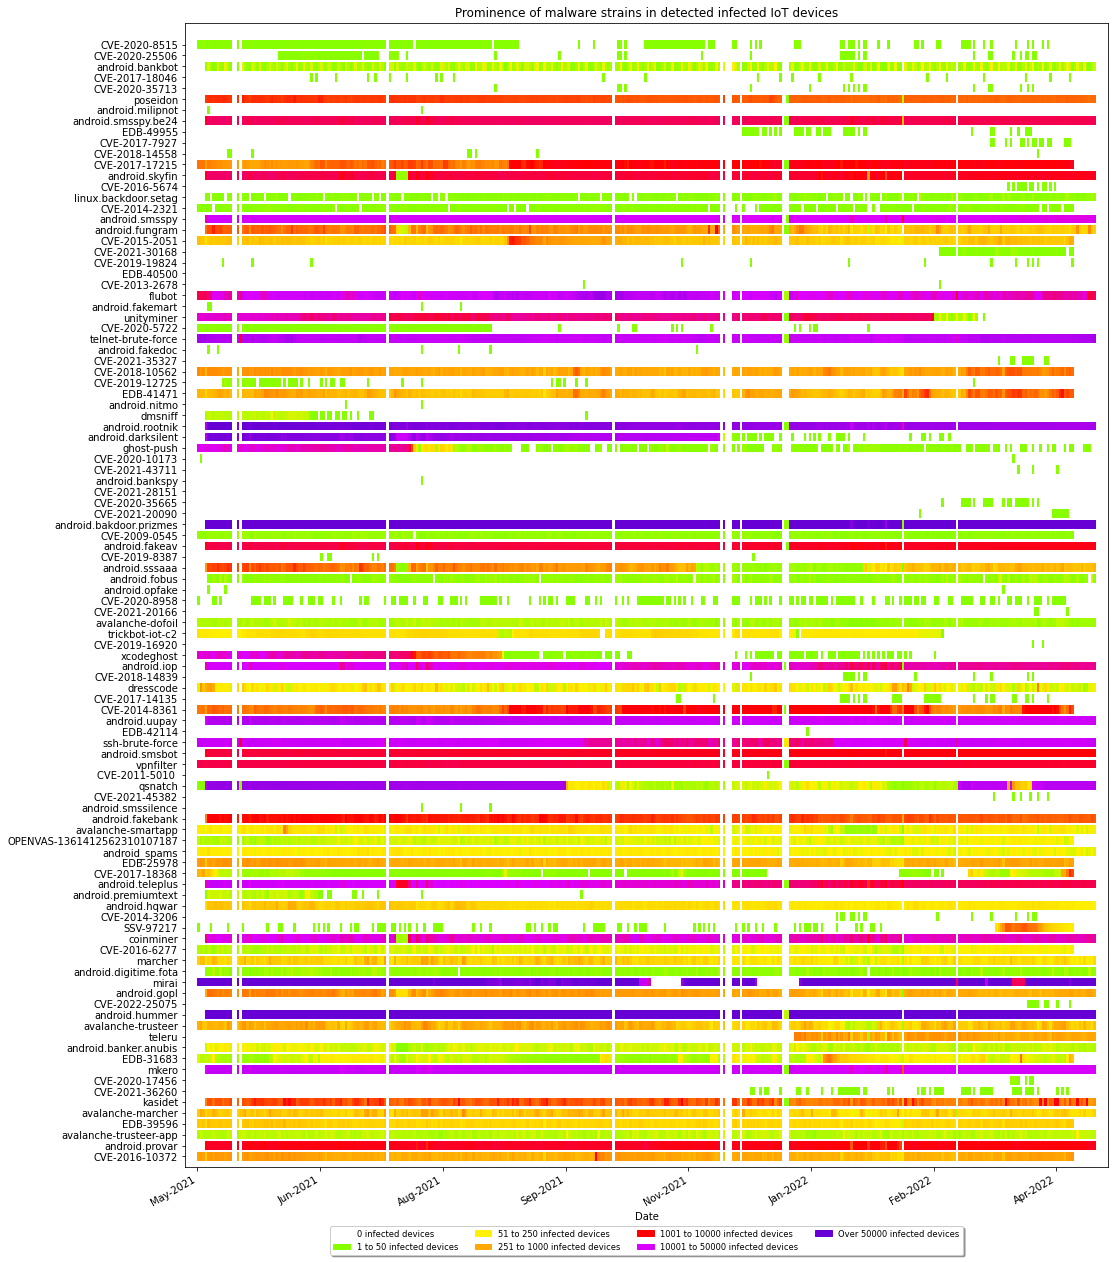

In [21]:
from datetime import timedelta

plt.rcParams["figure.figsize"] = (16.54, 23.38)

fig, ax = plt.subplots()
y = 0
done = 0
for infection in infection_names:
	for c in range(len(output[infection]) - 1):
		ax.barh(y, 1, left= m_dates[c], height=0.8, align='center', color=output[infection][c])
	y += 1
	done += 1
	print(f'{str(done).zfill(len(str(len(infection_names))))}/{len(infection_names)}: {infection}')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) 
ax.axis('tight')
ax.set_xlim([m_dates[0] - timedelta(days=5), m_dates[-1] + timedelta(days=5)])
ax.set_ylim([-1, 104])
ax.set_yticks(np.arange(len(infection_names)))
ax.set_yticklabels(infection_names)

import matplotlib.patches as mpatches
patch1 = mpatches.Patch(color='#FFFFFF', label='0 infected devices')
patch2 = mpatches.Patch(color='#85ff00', label='1 to 50 infected devices')
patch3 = mpatches.Patch(color='#fff100', label='51 to 250 infected devices')
patch4 = mpatches.Patch(color='#ffaa04', label='251 to 1000 infected devices')
patch5 = mpatches.Patch(color='#ff0000', label='1001 to 10000 infected devices') 
patch6 = mpatches.Patch(color='#dc00ff', label='10001 to 50000 infected devices')
patch7 = mpatches.Patch(color='#6700d4', label='Over 50000 infected devices')

ax.set_title('Prominence of malware strains in detected infected IoT devices')
ax.legend(bbox_to_anchor=(0.5, -0.08), loc='lower center', fontsize='small', ncol=4, fancybox=True, shadow=True, handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7])

ax.set_xlabel('Date')

fig.autofmt_xdate()
plt.savefig('../images/infections-better.png', facecolor='white', transparent=False, bbox_inches='tight', pad_inches=.2, dpi=300)
plt.show()